In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [92]:
data = pd.read_csv('C:/Users/hp/Downloads/cluster.csv', encoding= 'unicode_escape')

In [93]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [94]:
data.shape

(541909, 8)

# Data Overview and Cleaning

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [96]:
data['Country'].value_counts() #Most Customers are from UK.

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [97]:
data.drop('StockCode',axis=1,inplace=True)

In [98]:
data.isnull().sum()

InvoiceNo           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [99]:
data.dropna(inplace=True)

In [100]:
data.loc[data['CustomerID'].isnull()==True]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [101]:
data[data['Quantity'] < 0]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...
540449,C581490,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [102]:
data[data['UnitPrice'] < 0]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [103]:
# drop negative values
data.drop(data[data['Quantity'] < 0].index, inplace = True)
data.drop(data[data['UnitPrice'] < 0].index, inplace = True)

In [104]:
data.shape

(397924, 7)

# RFM ANALYSIS (Recency , Frequency and Monitory Analysis)
We are going to analysis the Customers based on below 4 factors:

1.Total amount a customer spent: Amount = Quantity * UnitPrice

2.Number of transaction: Number of InvoiceNo by Customer

3.Last transaction: the days since last transaction

4.Country: country where customer made the transaction

1.Total amount a customer spent: Amount = Quantity * UnitPrice

In [105]:
#creating feature for amount spend by customer
data['amount']=data['Quantity']*data['UnitPrice']

In [106]:
data.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [107]:
tm = data.groupby('CustomerID')['amount'].sum().reset_index()
tm

,CustomerID,amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [108]:
#number_transaction:
nt = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
nt

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [109]:
#Last transaction: 
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Last_transaction']=(data['InvoiceDate'].max()-data['InvoiceDate']).dt.days
lt = data.groupby(['CustomerID','Country'])['Last_transaction'].max().reset_index()
lt

,CustomerID,Country,Last_transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


# Creating RFM dataset: Now, I will Merge and Create the RFM dataset:

In [111]:
merge1 = pd.merge(lt, nt, how='inner', on ='CustomerID')
new_df = pd.merge(merge1,tm,how='inner',on = 'CustomerID')
new_df

,CustomerID,Country,Last_transaction,InvoiceNo,amount
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


# EDA

1.Remove Outlier:

There are several method to remove outlier such as IQR method, Z-score Method, Standard Deviation Method.

In this kernel, I use IQR method to remove outliers.

First, I will plot the boxplot to show the distribution of new data

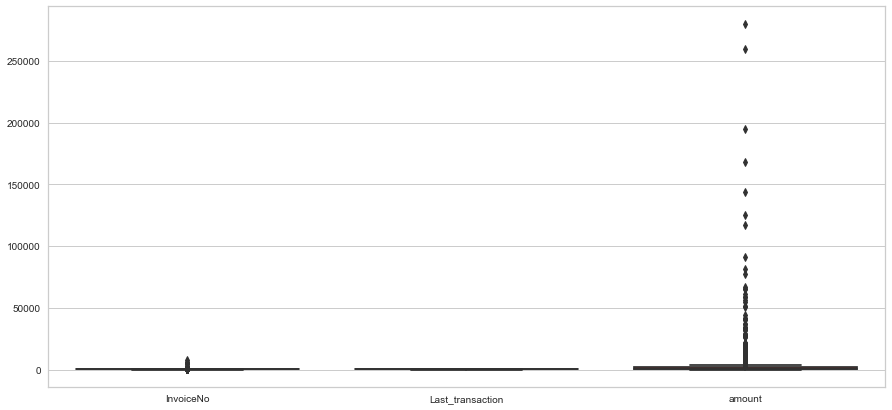

In [112]:
plt.figure(figsize=(15,7))
sns.boxplot(data = new_df[['InvoiceNo','Last_transaction','amount']]) #Box plots to get the idea for Outliers
plt.show()

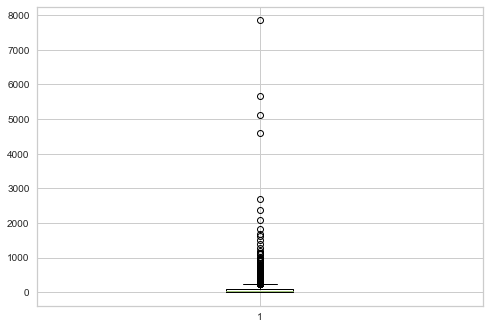

In [113]:
#Removing Outliers from Invoice No using the IQR Technique
plt.boxplot(new_df.InvoiceNo)
Q1 = new_df.InvoiceNo.quantile(0.25)
Q3 = new_df.InvoiceNo.quantile(0.75)
IQR = Q3 - Q1
new_df = new_df[(new_df.InvoiceNo >= Q1 - 1.5*IQR) & (new_df.InvoiceNo <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1da379cfc40>,
 'caps': [<matplotlib.lines.Line2D at 0x1da379db3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da379cf8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1da379dbac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da379dbe50>],
 'means': []}

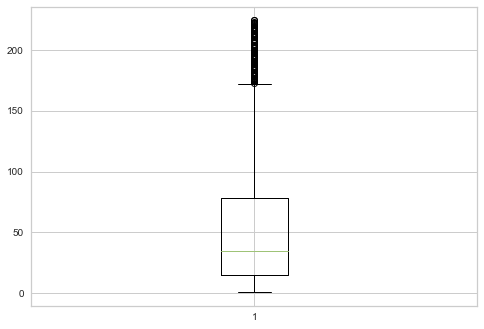

In [114]:
plt.boxplot(new_df.InvoiceNo)

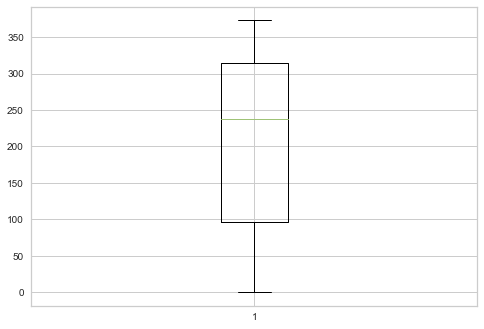

In [115]:
#Removing Outliers from Last_transaction No using the IQR Technique
plt.boxplot(new_df.Last_transaction)
Q1 = new_df.Last_transaction.quantile(0.25)
Q3 = new_df.Last_transaction.quantile(0.75)
IQR = Q3 - Q1
new_df = new_df[(new_df.Last_transaction >= Q1 - 1.5*IQR) & (new_df.Last_transaction <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1da3e2ce400>,
 'caps': [<matplotlib.lines.Line2D at 0x1da3e2ceb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da3e2ce070>],
 'medians': [<matplotlib.lines.Line2D at 0x1da3e2da280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da3e2da610>],
 'means': []}

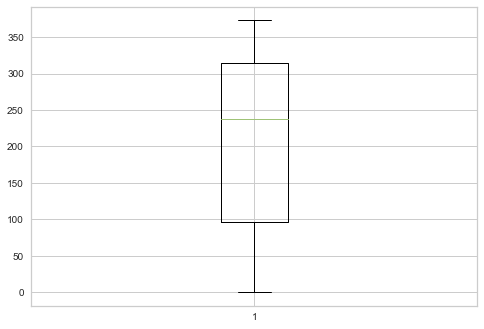

In [116]:
plt.boxplot(new_df.Last_transaction)

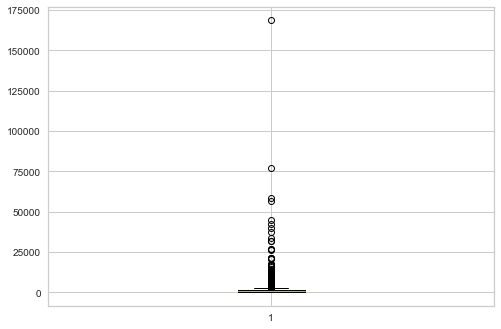

In [117]:
#Removing Outliers from Last_transaction No using the IQR Technique
plt.boxplot(new_df.amount)
Q1 = new_df.amount.quantile(0.25)
Q3 = new_df.amount.quantile(0.75)
IQR = Q3 - Q1
new_df = new_df[(new_df.amount >= Q1 - 1.5*IQR) & (new_df.amount <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1da3e397d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1da3e3a54c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da3e3979d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1da3e3a5be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da3e3a5f70>],
 'means': []}

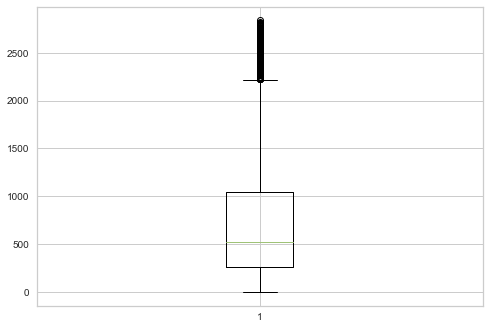

In [118]:
plt.boxplot(new_df.amount)

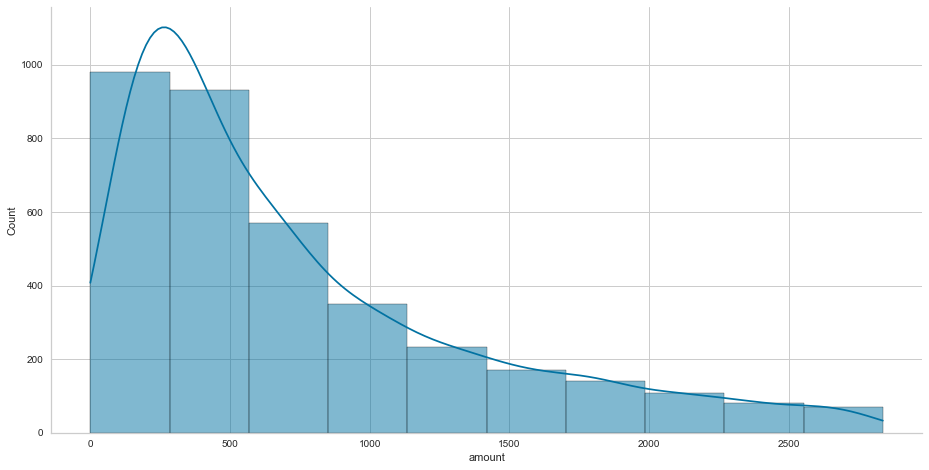

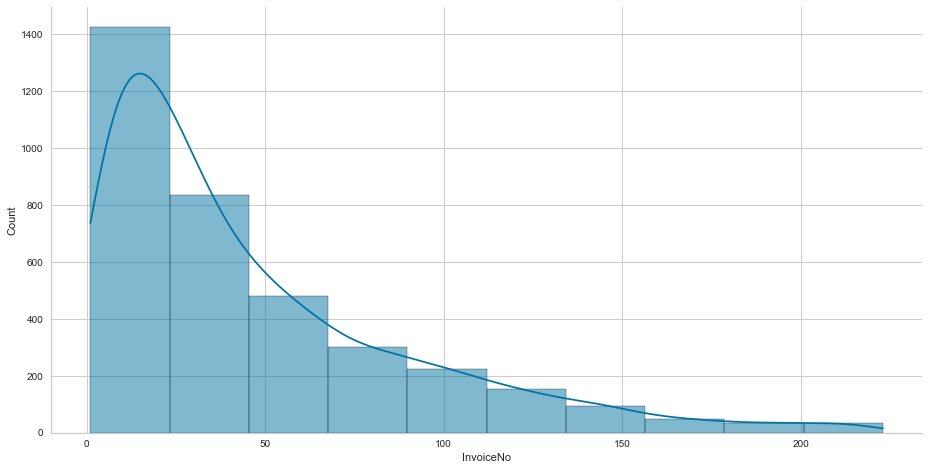

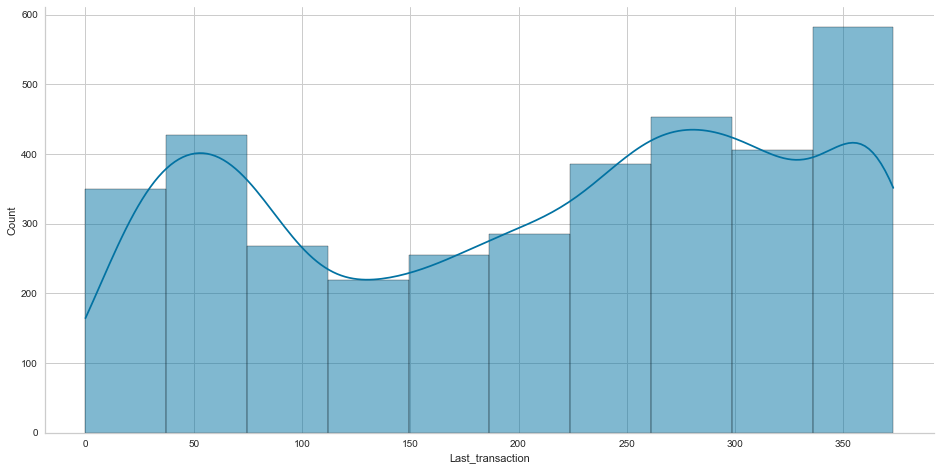

In [119]:
#Histogram Plot: 
new1_df = new_df.copy( deep = True)
df_num=['amount','InvoiceNo','Last_transaction']
for i in df_num:
    sns.displot(new1_df[i],bins=10,kde=True)
    plt.gcf().set_size_inches(15, 7)
    plt.show()

Total Amount (Monetary) and InvoiceNo (Frequency) histogram are right-skewed

Last_Transaction (Recency) histogram is bimodal

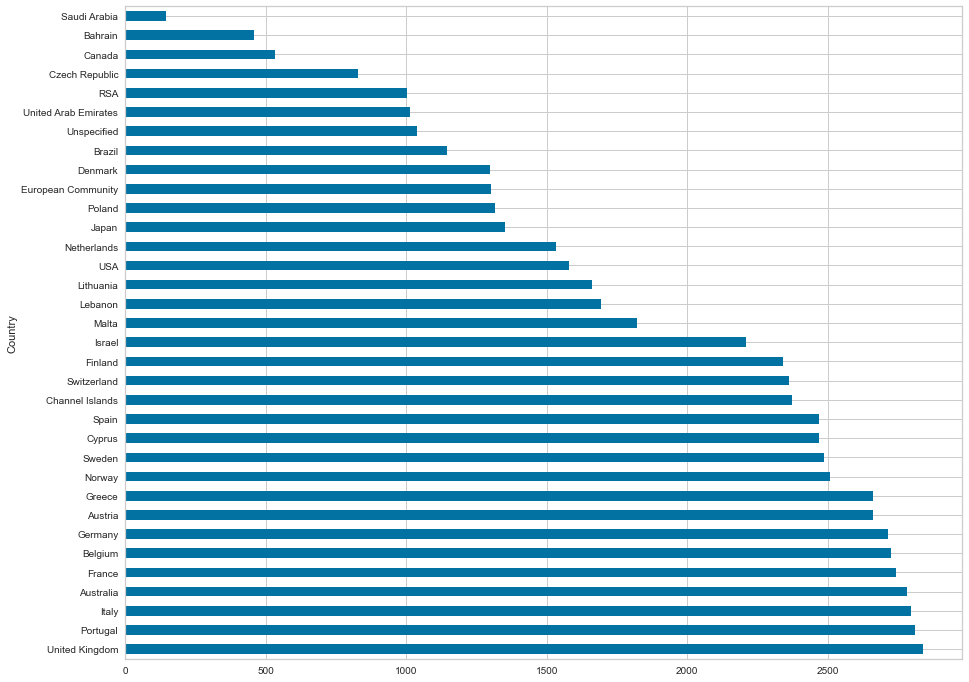

In [120]:
# Group the Maximum Total Amount by Country:
plt.figure(figsize=(15,12))
new1_df.groupby("Country").amount.max().sort_values(ascending=False).plot.barh()
plt.show()

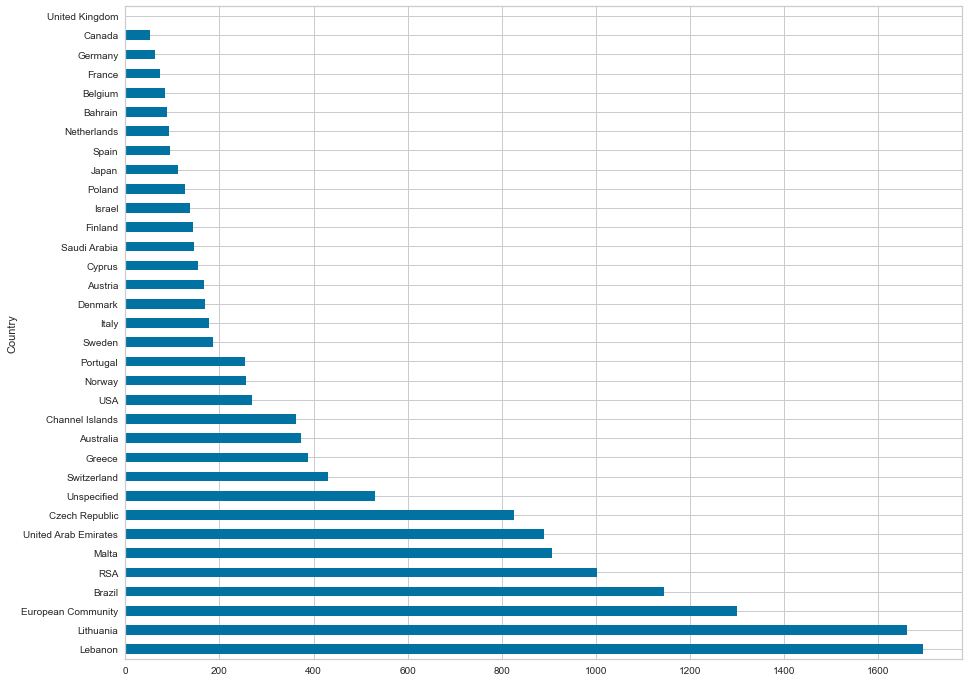

In [121]:
# Group the Minimum Total Amount by Country:
plt.figure(figsize=(15,12))
new1_df.groupby("Country").amount.min().sort_values(ascending=False).plot.barh()
plt.show()

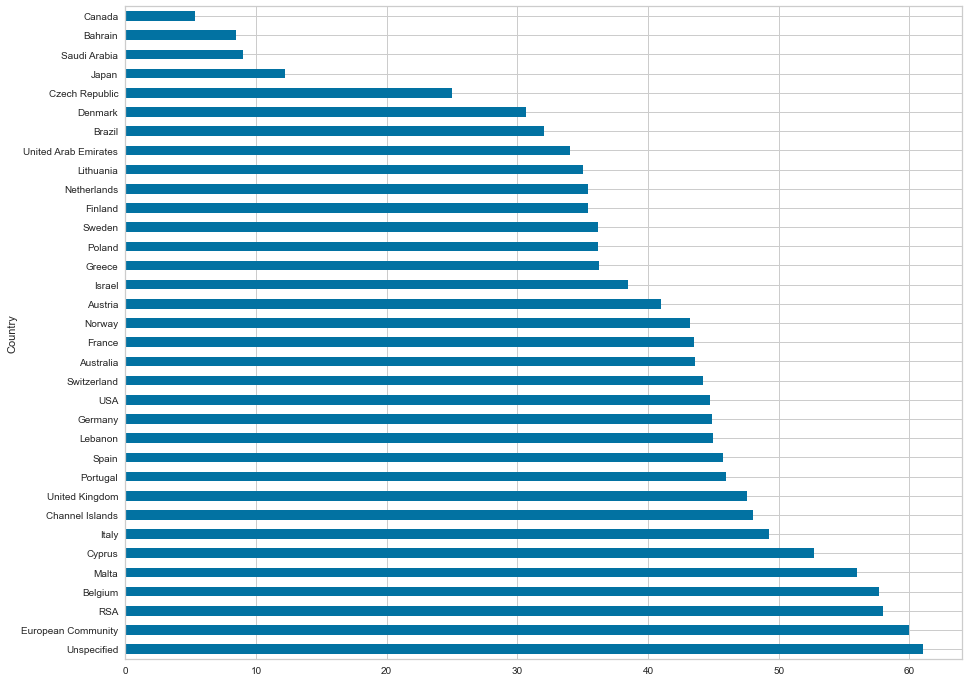

In [122]:
# Group by the Frequency by Country
plt.figure(figsize=(15,12))
new1_df.groupby("Country").InvoiceNo.mean().sort_values(ascending=False).plot.barh()
plt.show()

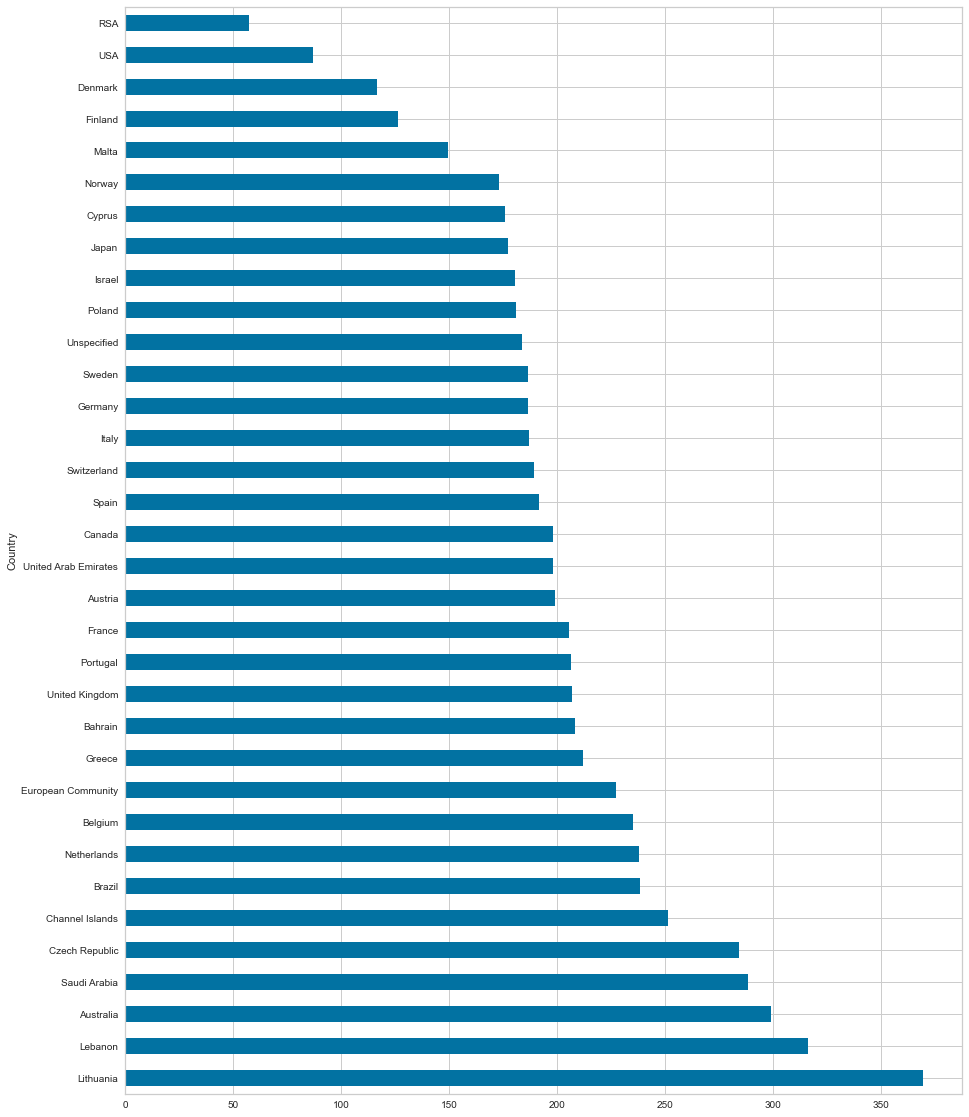

In [123]:
plt.figure(figsize=(15,20))
new1_df.groupby("Country").Last_transaction.mean().sort_values(ascending=False).plot.barh()
plt.show()

On average, Customers in Lithuania shop the most recently

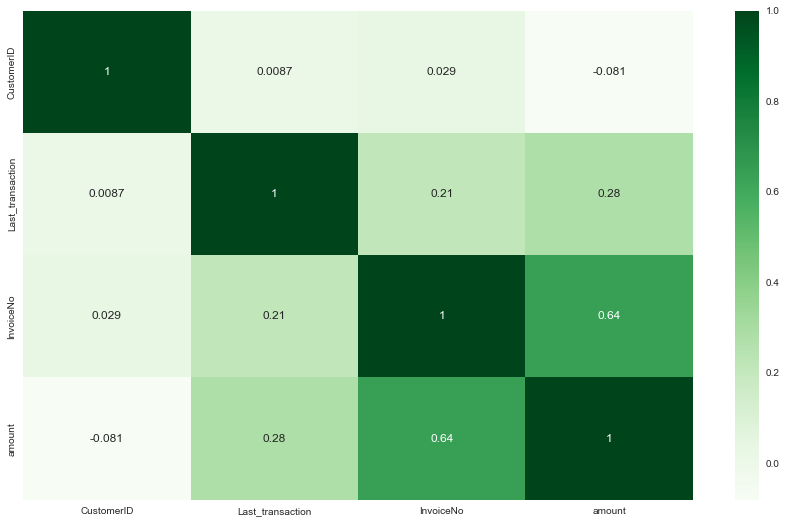

In [124]:
plt.figure(figsize=(15,9))
sns.heatmap(new1_df.corr(),cmap="Greens", annot=True)
plt.show()

<Figure size 1080x576 with 0 Axes>

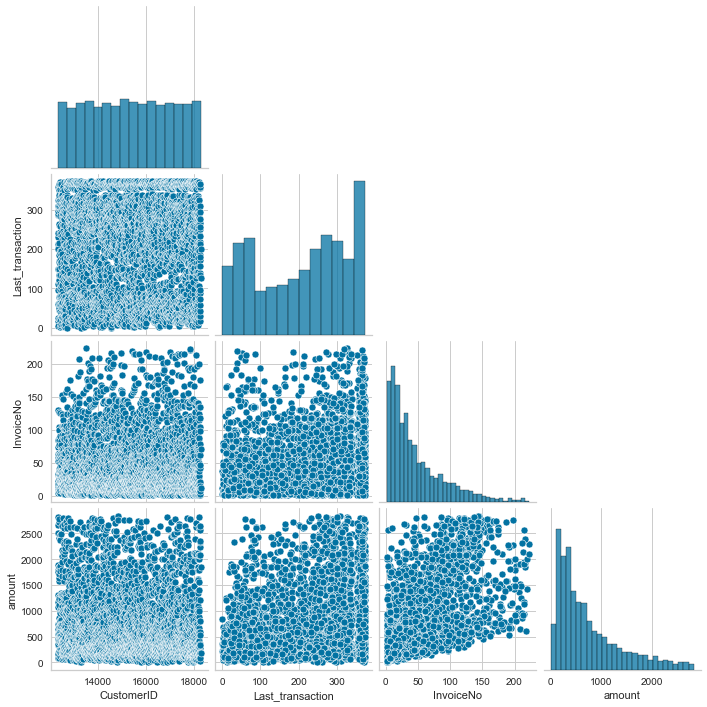

In [125]:
plt.figure(figsize=(15,8))
sns.pairplot(new1_df, corner=True)
plt.show()

In [126]:
#Scaling the numeric data
from sklearn.preprocessing import MinMaxScaler
new2_df = new1_df[['Last_transaction','InvoiceNo','amount']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)


In [127]:
df_k  = pd.DataFrame(scaled_df , columns =['Last_transaction','InvoiceNo','amount'])

In [128]:
df_k

,Last_transaction,InvoiceNo,amount
0,0.957105,0.135135,0.633569
1,0.048257,0.324324,0.619578
2,0.828418,0.072072,0.117884
3,0.793566,0.378378,0.883438
4,0.544236,0.013514,0.031375
...,...,...,...
3630,0.195710,0.036036,0.061304
3631,0.742627,0.040541,0.063666
3632,0.482574,0.027027,0.028491
3633,0.335121,0.049550,0.062767


# Clustering

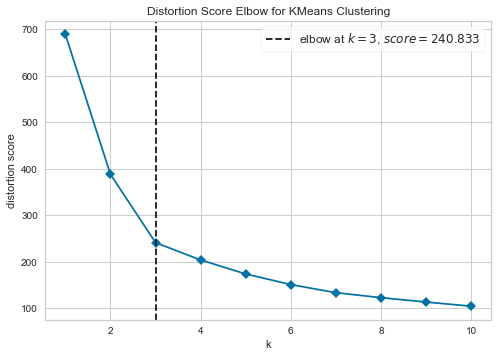

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [129]:

# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

Elbow method helps us decide the clusters for our data are 3. Next step I want to visualize the data by clusters

In [130]:

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_k)
df_k['clusters']= y_predicted
df_k

,Last_transaction,InvoiceNo,amount,clusters
0,0.957105,0.135135,0.633569,1
1,0.048257,0.324324,0.619578,0
2,0.828418,0.072072,0.117884,2
3,0.793566,0.378378,0.883438,1
4,0.544236,0.013514,0.031375,2
...,...,...,...,...
3630,0.195710,0.036036,0.061304,0
3631,0.742627,0.040541,0.063666,2
3632,0.482574,0.027027,0.028491,0
3633,0.335121,0.049550,0.062767,0


In [147]:
new2_df = pd.DataFrame(scaler.inverse_transform(df_k[['Last_transaction','InvoiceNo','amount']] ), columns =['Last_transaction','InvoiceNo','amount'])

In [148]:
from sklearn.metrics import silhouette_score
score = silhouette_score(new2_df, km.labels_, metric='euclidean')
print(score)

0.1902756002344356


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3))

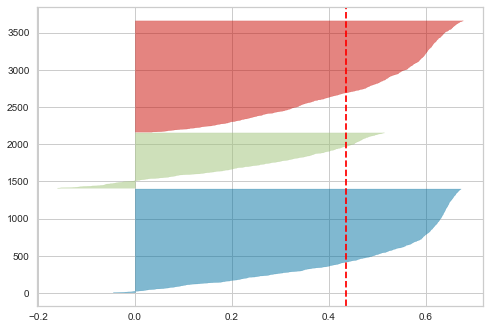

In [133]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df_k.drop("clusters" ,axis =1 ))

In [134]:
df_k3  = df_k.drop("clusters" ,axis =1 )

In [138]:
#Silhoutte score with four clusters
km4 = KMeans(n_clusters=4)
y_predicted_4 = km4.fit_predict(df_k3)
score = silhouette_score(df_k3, km4.labels_, metric='euclidean')
print(score)

0.4144406627502176


In [140]:
#Silhoutte score with four clusters
km3 = KMeans(n_clusters=3)
y_predicted_3 = km3.fit_predict(df_k3)
score = silhouette_score(df_k3, km3.labels_, metric='euclidean')
print(score)

0.4352894462914948


In [142]:
#Silhoutte score with four clusters
km2 = KMeans(n_clusters=2)
y_predicted_2 = km2.fit_predict(df_k3)
score = silhouette_score(df_k3, km2.labels_, metric='euclidean')
print(score)

0.4044838908392202


In [81]:
new2_df 

,Last_transaction,InvoiceNo,amount,clusters
0,357.0,31.0,1797.24,2
1,25.0,73.0,1757.55,1
2,309.0,17.0,334.40,0
3,203.0,4.0,129.49,0
4,231.0,58.0,1079.40,2
...,...,...,...,...
3411,73.0,9.0,173.90,1
3412,277.0,10.0,180.60,0
3413,180.0,7.0,129.49,0
3414,125.0,12.0,178.05,1


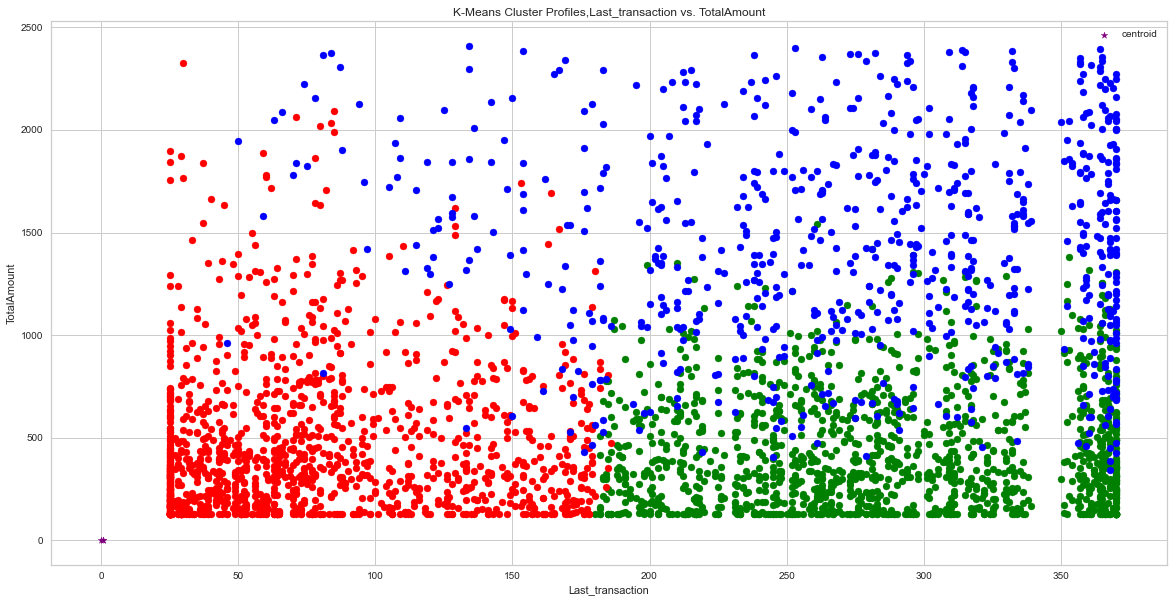

In [83]:
# Visualize the clusters with original data

df1 = new2_df[new2_df.clusters==0]
df2 = new2_df[new2_df.clusters==1]
df3 = new2_df[new2_df.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1['amount'],color='green')
plt.scatter(df2.Last_transaction,df2['amount'],color='red')
plt.scatter(df3.Last_transaction,df3['amount'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

In [84]:
new2_df

,Last_transaction,InvoiceNo,amount,clusters
0,357.0,31.0,1797.24,2
1,25.0,73.0,1757.55,1
2,309.0,17.0,334.40,0
3,203.0,4.0,129.49,0
4,231.0,58.0,1079.40,2
...,...,...,...,...
3411,73.0,9.0,173.90,1
3412,277.0,10.0,180.60,0
3413,180.0,7.0,129.49,0
3414,125.0,12.0,178.05,1


Group1: customer spent up to $2500 per purchase and their lastest order is within 3 months

Group 2: customer spent up to $1500 per purchase and their lastest order is between 3 months to 13 months

Group 3: customer spent from $ 1500 to 3500 per purchase and their lastest order varies from 1.5 month to 13 months


We have got three types of customer we can Make the Marketing starategies as per our requirements for each clusters.

C:\Users\hp\AppData\Local\Temp/ipykernel_8088/404375578.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

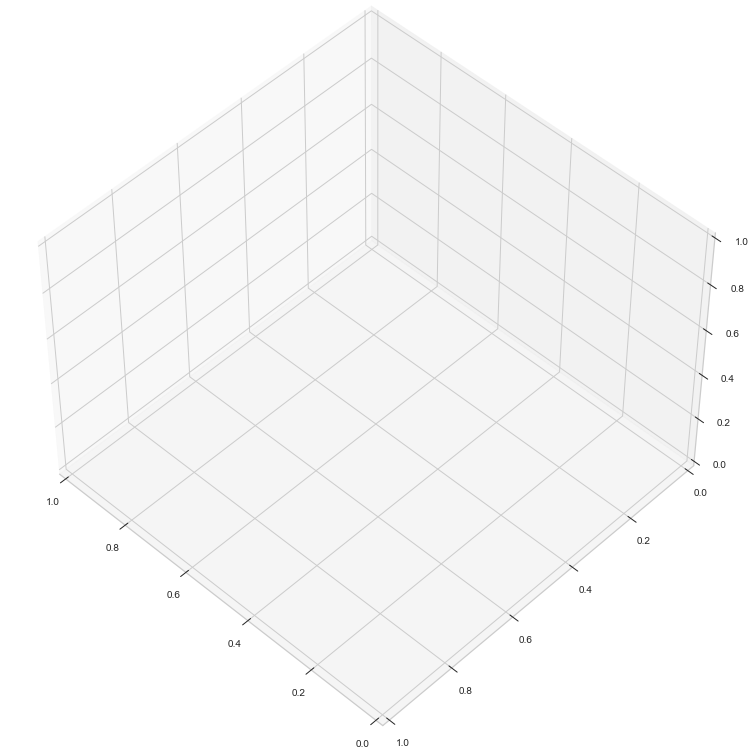

In [85]:
from mpl_toolkits.mplot3d import Axes3D
#Plotting
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(scaled_df['Last_transaction'], 
           scaled_df['InvoiceNo'], 
           scaled_df['amount'],
           c= (scaled_df['clusters']), 
           edgecolor="red", s=80)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("amount")
plt.title("K Means", fontsize=14)

In [67]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_k, km.labels_, metric='euclidean')
print(score)

0.4226642844095811


In [ ]:
# 0.473 when 

# Winsorization
Winsorization is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data. The mean value calculated after such replacement of the extreme values is called winsorized mean.

For example, 90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value of the data at the 5th percentile.